# Multi Linear Regression

# Assignment-5, 50_Startups

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Import dataset
df = pd.read_csv("50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and data visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df1 =df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
df1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df1[df1.duplicated()] #No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [7]:
df1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#Check for the missing values
df1.isnull().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

C:\Users\ronit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

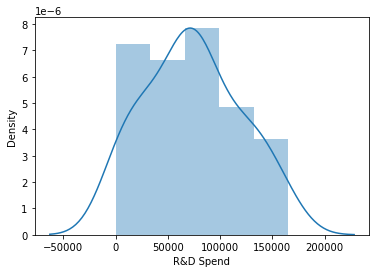

In [9]:
sns.distplot(df['R&D Spend'])

C:\Users\ronit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

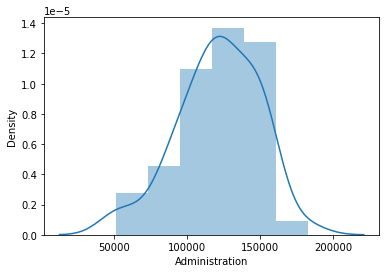

In [10]:
sns.distplot(df['Administration'])

C:\Users\ronit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

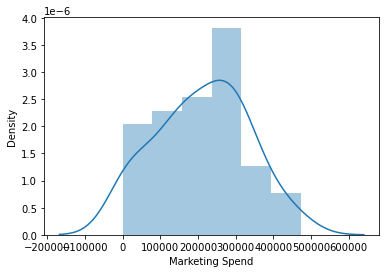

In [11]:
sns.distplot(df['Marketing Spend'])

C:\Users\ronit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

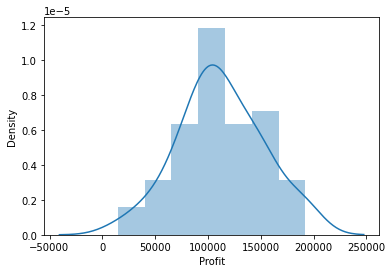

In [12]:
sns.distplot(df['Profit'])

In [13]:
df2= df1.drop(['State'],axis=1)

In [14]:
df2

,RDS,ADMS,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Data Transformation

1. Square Root Transformation: Transform the response variable from y to √y.

In [19]:
#create log-transformed data
df_log1 = np.sqrt(df2)

Text(0.5, 1.0, 'Square Root Transformed Data')

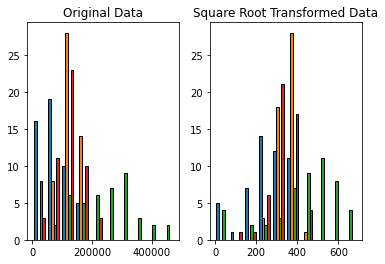

In [20]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df2, edgecolor='black')
axs[1].hist(df_log1, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

2. Cube Root Transformation: Transform the response variable from y to y1/3.

In [21]:
#create log-transformed data
df_log2 = np.cbrt(df2)

Text(0.5, 1.0, 'Cube Root Transformed Data')

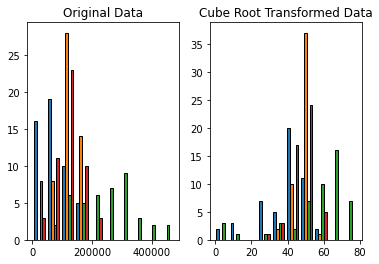

In [22]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df2, edgecolor='black')
axs[1].hist(df_log2, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

# Correlation Matrix

In [ ]:
df1.corr()

# Scatterplot between variables along with histograms

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df1)

# Model Building

In [ ]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=df1).fit()

# Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

In [ ]:
model.summary()

In [ ]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

In [ ]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

In [ ]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their t_values and p_values
slr_a = smf.ols("Profit~ADMS",data=df1).fit()
slr_a.tvalues , slr_a.pvalues  # ADMS has in-significant pvalue

In [ ]:
slr_m = smf.ols("Profit~MKTS",data=df1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

In [ ]:
mlr_am = smf.ols("Profit~ADMS+MKTS",data=df1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

# Model Validation 

# Two Techniques: 1. Collinearity check & 2. Residual Analysis

In [ ]:
# Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=df1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=df1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=df1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

In [ ]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-30000))

In [ ]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [ ]:
# Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

In [ ]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

In [ ]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

In [ ]:
df1[df1.index.isin([49])] 

# Improving the Model

In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df2=df1.drop(df1.index[[49]],axis=0).reset_index(drop=True)
df2.head()

# Model Deletion Diagnostics and Final Model

In [ ]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df2=df2.drop(df2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

# Model Predictions

In [ ]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

In [ ]:
# Manual Prediction of Price
final_model.predict(new_data)

In [ ]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df2)
pred_y


# table containing R^2 value for each prepared model

In [ ]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table